In [1]:
import torch
import torch.nn as nn
from torchvision import models
import numpy as np

import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

# set display defaults
plt.rcParams['figure.figsize'] = (15, 15)        # large images
plt.rcParams['image.interpolation'] = 'nearest'  # don't interpolate: show square pixels
plt.rcParams['image.cmap'] = 'gray'  # use grayscale output rather than a (potentially misleading) color heatmap


## Alexnet pretained on Imagenet

In [2]:
model = models.alexnet(pretrained=True)

# remove last fully-connected layer
new_classifier = nn.Sequential(*list(model.classifier.children())[:-1])
model.classifier = new_classifier
print model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [3]:
for name, parameter in model.named_parameters():
        if parameter.requires_grad:
            print(name, parameter.shape)
print('    Total params: %.2fM' % (sum(p.numel() for p in model.parameters())/1000000.0))

('features.0.weight', torch.Size([64, 3, 11, 11]))
('features.0.bias', torch.Size([64]))
('features.3.weight', torch.Size([192, 64, 5, 5]))
('features.3.bias', torch.Size([192]))
('features.6.weight', torch.Size([384, 192, 3, 3]))
('features.6.bias', torch.Size([384]))
('features.8.weight', torch.Size([256, 384, 3, 3]))
('features.8.bias', torch.Size([256]))
('features.10.weight', torch.Size([256, 256, 3, 3]))
('features.10.bias', torch.Size([256]))
('classifier.1.weight', torch.Size([4096, 9216]))
('classifier.1.bias', torch.Size([4096]))
('classifier.4.weight', torch.Size([4096, 4096]))
('classifier.4.bias', torch.Size([4096]))
    Total params: 57.00M


In [4]:
def vis_square(data):
    """Take an array of shape (n, height, width) or (n, height, width, 3)
       and visualize each (height, width) thing in a grid of size approx. sqrt(n) by sqrt(n)"""
    
    # normalize data for display
    data = (data - data.min()) / (data.max() - data.min())
    
    # force the number of filters to be square
    n = int(np.ceil(np.sqrt(data.shape[0])))
    padding = (((0, n ** 2 - data.shape[0]),
               (0, 1), (0, 1))                 # add some space between filters
               + ((0, 0),) * (data.ndim - 3))  # don't pad the last dimension (if there is one)
    data = np.pad(data, padding, mode='constant', constant_values=1)  # pad with ones (white)
    
    # tile the filters into an image
    data = data.reshape((n, n) + data.shape[1:]).transpose((0, 2, 1, 3) + tuple(range(4, data.ndim + 1)))
    data = data.reshape((n * data.shape[1], n * data.shape[3]) + data.shape[4:])
    
    plt.imshow(data); plt.axis('off')

In [9]:
# the parameters are a list of [weights, biases]
filters = model.named_parameters
print('filters', filters)

('filters', <bound method AlexNet.named_parameters of AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropou

In [4]:
conv1 = model.features[0].weight
print conv1.shape

torch.Size([64, 3, 11, 11])


In [6]:
conv1_grad = model.features[0].weight.grad
print type(conv1_grad)  # visible after backward computation
print conv1_grad.shape

<type 'NoneType'>


AttributeError: 'NoneType' object has no attribute 'shape'

In [14]:
print conv1[0]

tensor([[[ 0.1186,  0.0941,  0.0954,  0.1052,  0.1029,  0.0672,  0.0505,
           0.0501,  0.0558,  0.0216,  0.0500],
         [ 0.0749,  0.0389,  0.0530,  0.0760,  0.0723,  0.0729,  0.0520,
           0.0271,  0.0257, -0.0113,  0.0042],
         [ 0.0754,  0.0388,  0.0549,  0.0558,  0.0525,  0.0500,  0.0476,
           0.0253,  0.0436,  0.0102,  0.0133],
         [ 0.0704,  0.0525,  0.0631,  0.0622,  0.0589,  0.0386,  0.0450,
           0.0381,  0.0458,  0.0019,  0.0030],
         [ 0.0873,  0.0750,  0.0716,  0.0834,  0.0946,  0.0654,  0.0335,
           0.0210,  0.0221, -0.0106, -0.0343],
         [ 0.0958,  0.0992,  0.1006,  0.1088,  0.0726,  0.0361, -0.0075,
          -0.0431, -0.0379, -0.0568, -0.0560],
         [ 0.1150,  0.1155,  0.1071,  0.0915,  0.0029, -0.0900, -0.1133,
          -0.1391, -0.1248, -0.0845, -0.0745],
         [ 0.0955,  0.1103,  0.0825,  0.0421, -0.0594, -0.1595, -0.1237,
          -0.1581, -0.1643, -0.1153, -0.0928],
         [ 0.0932,  0.1037,  0.0675,  0.

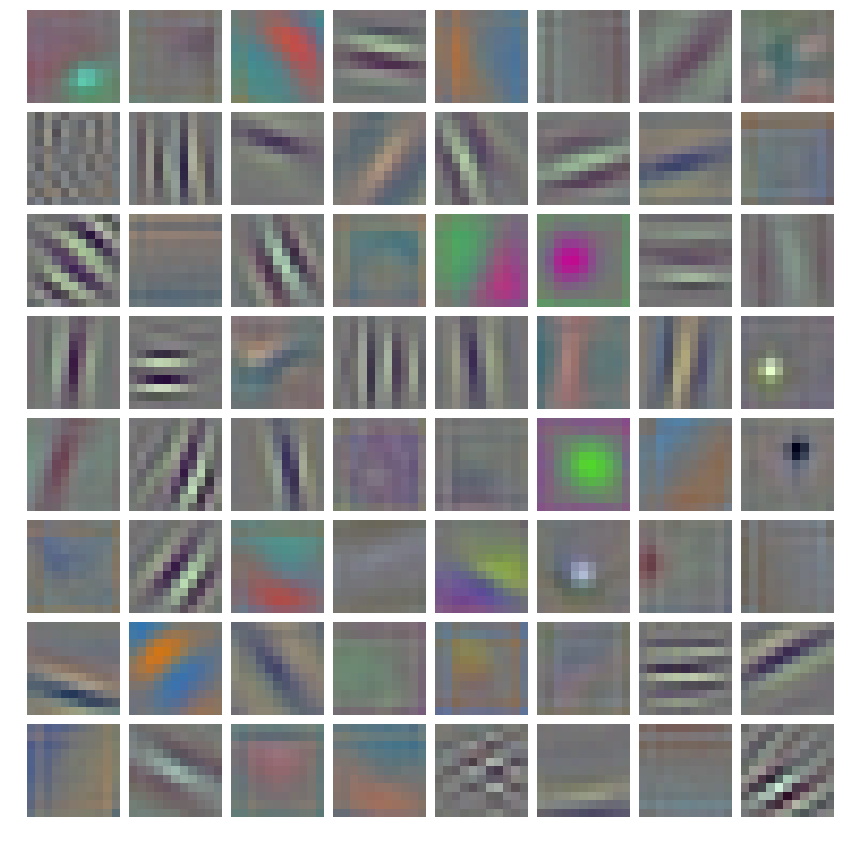

In [28]:
conv1_filter = conv1.detach().numpy()
vis_square(conv1_filter.transpose(0, 2, 3, 1))  # ones (white)

idx [167]
torch.Size([64, 5, 5])


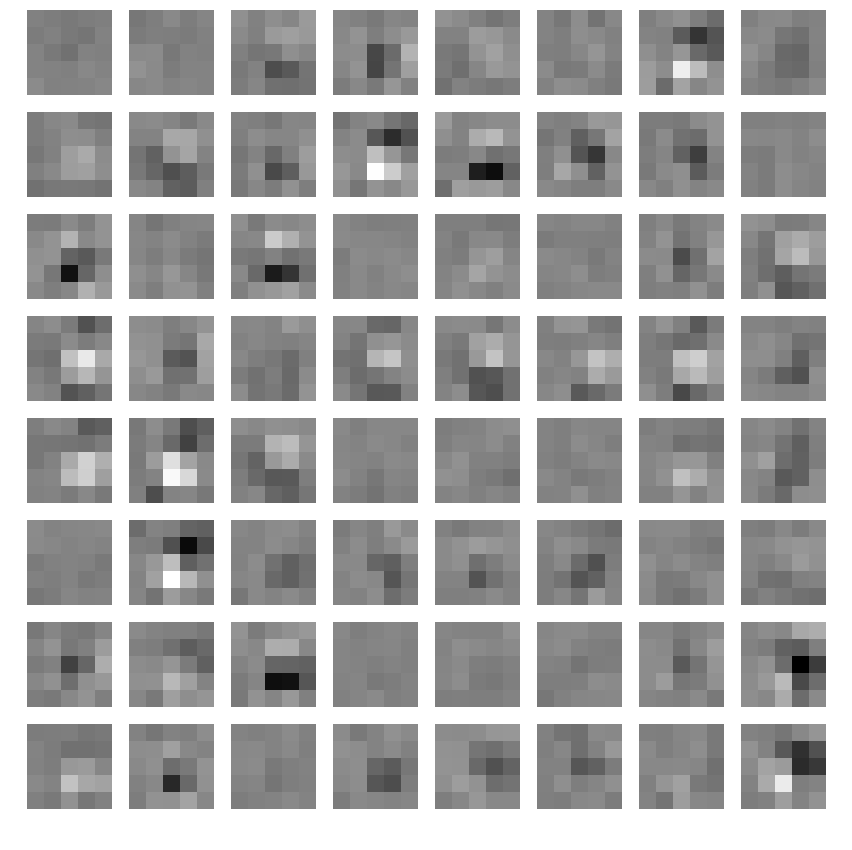

In [46]:
idx = np.random.randint(192, size=1)

print 'idx', idx
conv3 = model.features[3].weight[idx].squeeze(0)
# print conv2

print conv3.shape
conv3_filter = conv3.detach().numpy()
vis_square(conv3_filter)

## Alexnet trained on Cifar 10

In [52]:
from 
resume = '/media/jaden/DeepLearningCode/pytorch-classification/checkpoints/cifar10/alexnet/model_best.pth.tar'
checkpoint = torch.load(resume)
best_acc = checkpoint['best_acc']
model.load_state_dict(checkpoint['state_dict'])

print 'best_acc', best_acc
print 'model', model

RuntimeError: Error(s) in loading state_dict for AlexNet:
	Missing key(s) in state_dict: "features.0.bias", "features.0.weight", "features.3.bias", "features.3.weight", "features.6.bias", "features.6.weight", "features.8.bias", "features.8.weight", "features.10.bias", "features.10.weight", "classifier.1.bias", "classifier.1.weight", "classifier.4.bias", "classifier.4.weight". 
	Unexpected key(s) in state_dict: "module.features.0.weight", "module.features.0.bias", "module.features.3.weight", "module.features.3.bias", "module.features.6.weight", "module.features.6.bias", "module.features.8.weight", "module.features.8.bias", "module.features.10.weight", "module.features.10.bias", "module.classifier.weight", "module.classifier.bias". 